HW_2 Code and Report
Author: Aaron Dhillon

In [9]:
import skimage
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters


Problem 1: Perform Gaussian smoothing on the grayscale image affleck_gray.png (or
affleck_gray_flip.png). Try with multiple sigma values, starting with larger values
(e.g., from 20 to .5). When does the face become recognizable to your friends? [2 pts]

**Discussion**: It became more clear to my friends around a sigma value of 6 that this is Ben Affleck. Although I know who it is I believe for most it wouldn't be recognizable until closer to 3 or 4.


(np.float64(-0.5), np.float64(799.5), np.float64(1066.5), np.float64(-0.5))

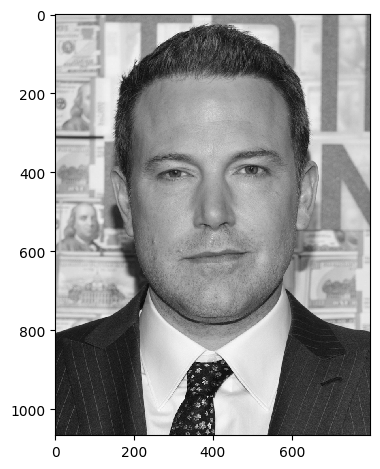

In [10]:
sigma = 0.5 # use different values
faceIm = io.imread("affleck_gray.png").astype('float64')
# ‘truncate’ builds filter to 3*sigma size
gIm = filters.gaussian(faceIm, sigma=sigma, truncate=3)
io.imshow(gIm/255) # float images need range of 0-1
plt.axis("image")

Problem 2: Write a function to compute and display the 2D Gaussian derivative masks Gx and Gy for a given sigma. Sample the Gaussian derivative/gradient (2D) equation
directly (see class notes) at the appropriate x,y (row, col) locations. Note: each mask is a square 2D matrix. Please ensure that the positive derivative lobe is on the side of the increasing direction of each axis for each mask (use a negative sign in your equations if needed). Plot each mask (either in 2D or 3D). [3 pts]

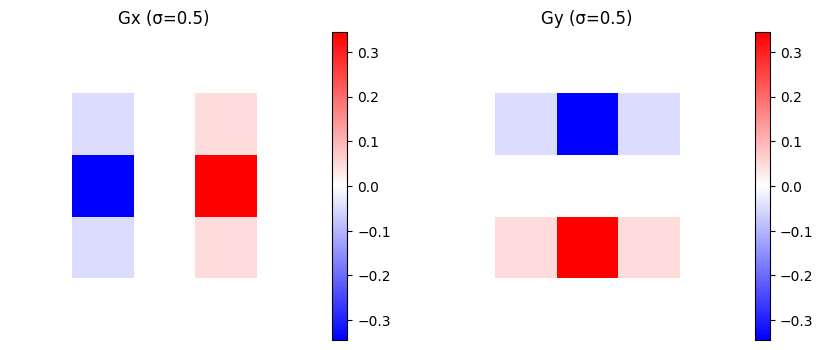

In [11]:
def gaussDeriv2D(sigma):
    r = int(np.ceil(3 * sigma))   # mask radius
    y, x = np.mgrid[-r:r+1, -r:r+1]  # coordinate grid

    # Normalization factor and Gaussian exponent
    norm = 1.0 / (2.0 * np.pi * sigma**4)
    exp_term = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))

    # Derivatives of Gaussian
    Gx = (x * norm) * exp_term
    Gy = (y * norm) * exp_term

    # === Display ===
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    im0 = axes[0].imshow(Gx, cmap="bwr")
    axes[0].set_title(f"Gx (σ={sigma})")
    axes[0].axis("off")
    plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

    im1 = axes[1].imshow(Gy, cmap="bwr")
    axes[1].set_title(f"Gy (σ={sigma})")
    axes[1].axis("off")
    plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

    plt.show()

    return Gx, Gy

sigma = 0.5
Gx,Gy = gaussDeriv2D(sigma)

Problem 3: Compute and display the gradient magnitude of an image (search the web for an interesting image that has strong vertical and horizontal boundaries; convert to
grayscale if necessary; make sure to upload the image with your code in the Carmen
submission). [2 pts]

(np.float64(-0.5), np.float64(249.5), np.float64(199.5), np.float64(-0.5))

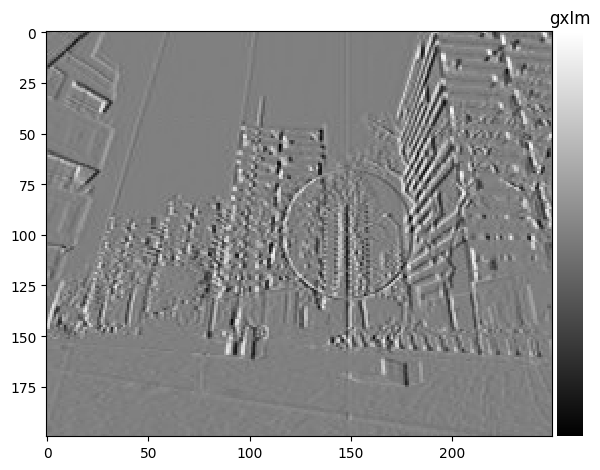

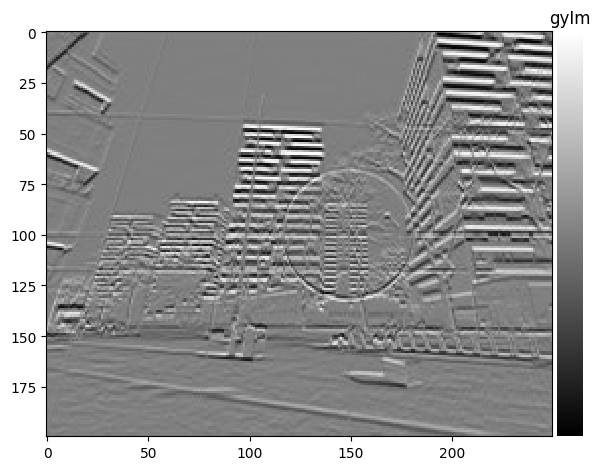

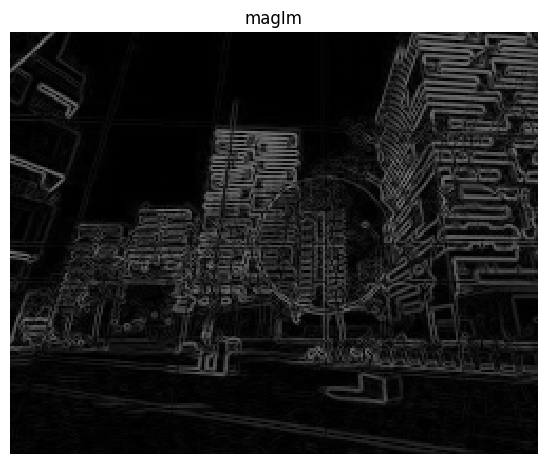

In [12]:
from skimage import io, color, img_as_float

# prep for q3
Im0 = io.imread("strong.jpeg")  # <- replace with your file
Im = img_as_float(color.rgb2gray(Im0)) if Im0.ndim == 3 else img_as_float(Im0)


import scipy
gxIm = scipy.ndimage.convolve(Im, Gx, mode='nearest')
gyIm = scipy.ndimage.convolve(Im, Gy, mode='nearest')
magIm = np.sqrt(gxIm**2 + gyIm**2)

plt.figure(); io.imshow(gxIm, cmap='gray'); plt.title('gxIm'); plt.axis('off')
plt.figure(); io.imshow(gyIm, cmap='gray'); plt.title('gyIm'); plt.axis('off')
plt.figure(); io.imshow(magIm, cmap='gray'); plt.title('magIm'); plt.axis('off')

Problem 4: Threshold and display the magnitude image with different threshold T levels. [2 pts]

**Discussion**: Noisy at smaller T and lots of edges. As T gets larger, the image gets smoother and smoother. Only stronger edges are preserved.

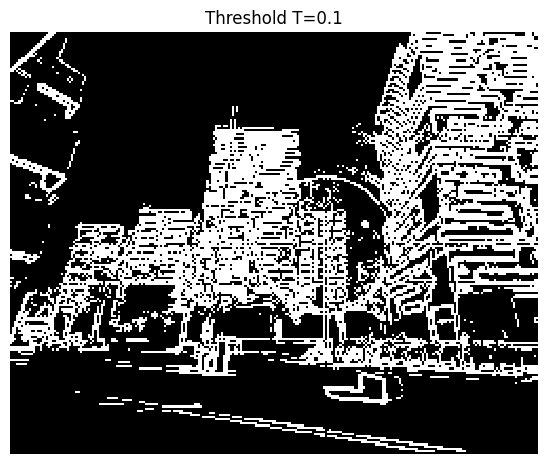

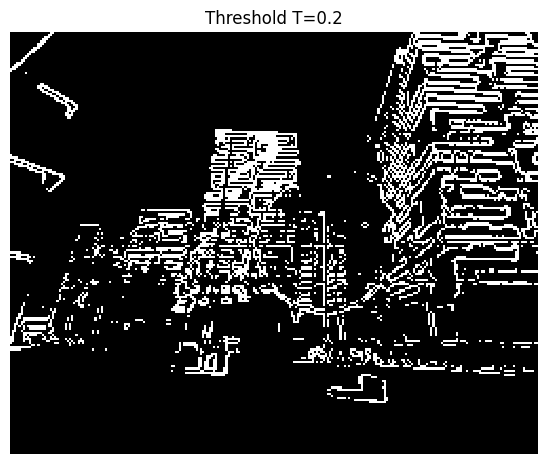

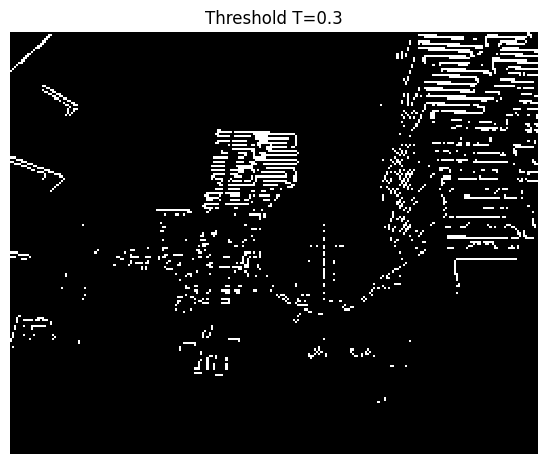

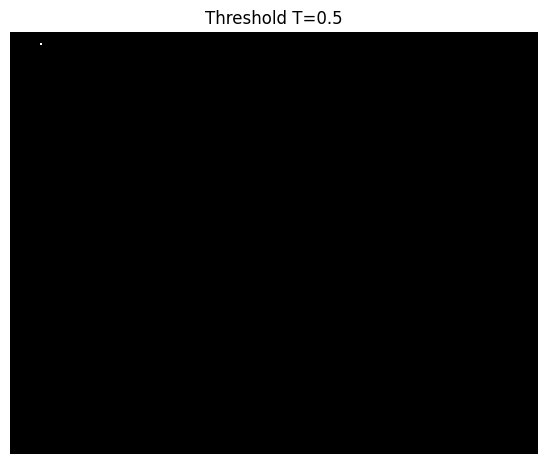

In [13]:
# Try multiple thresholds
for T in [0.1, 0.2, 0.3, 0.5]:
    tIm = magIm > T
    plt.figure()
    io.imshow(tIm, cmap='gray')
    plt.title(f'Threshold T={T}')
    plt.axis('off')


Problem 5: Compare the above results with the Sobel masks. [2 pts]

**Discussion:** Sobel tends to produce thinner but noisier edges—at low thresholds it lights up a lot of texture. Gaussian edges are cleaner because σ controls pre-smoothing; with a moderate σ they suppress noise and yield smoother edges.

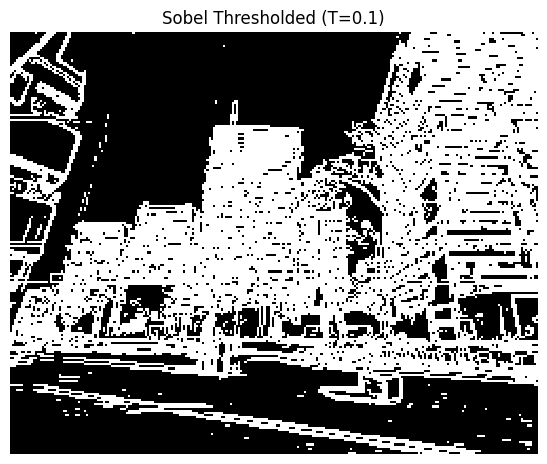

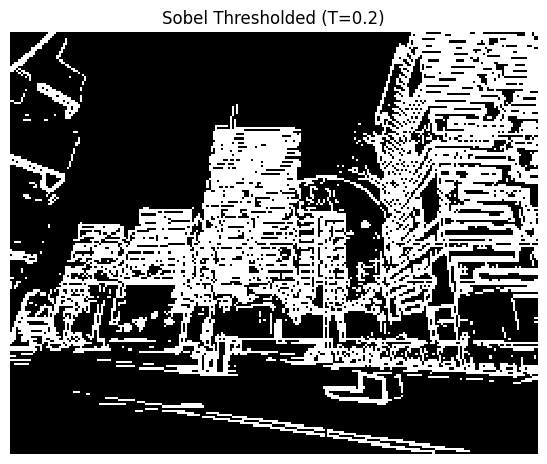

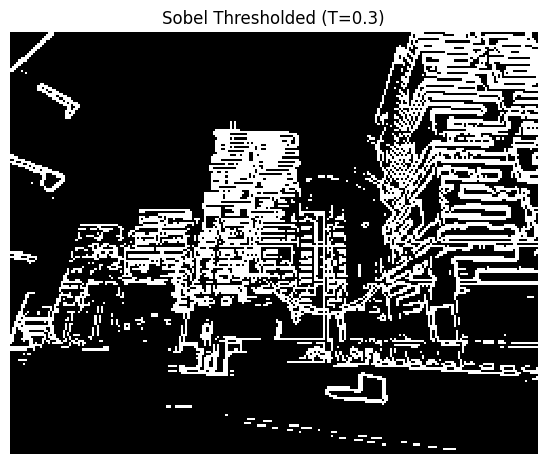

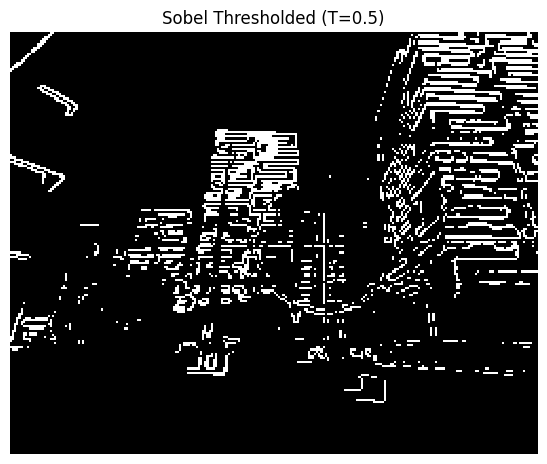

In [14]:
# 1) Compute Sobel responses in horizontal (x) and vertical (y) directions
fxIm = filters.sobel_h(Im)   # horizontal filter (x-derivative)
fyIm = filters.sobel_v(Im)   # vertical filter (y-derivative)

# 2) Gradient magnitude
magIm_sobel = np.sqrt(fxIm**2 + fyIm**2)

# 3) Threshold (same T values you tried in Q4 for fair comparison)
for T in [0.1, 0.2, 0.3, 0.5]:
    tIm = magIm_sobel > T
    plt.figure()
    io.imshow(tIm, cmap='gray')
    plt.title(f'Sobel Thresholded (T={T})')
    plt.axis('off')

Problem 6: Run the canny edge detector on your image and display the default results. How does it compare? (Note: You’ll likely need to play around with the sigma value to get a decent result.) [2 pts]

**Discussion**: The Canny edge detector gave the cleanest results compared to my earlier methods. Unlike thresholding or Sobel, the edges were much thinner and more continuous, with far less random noise. When I tried different sigma values, a small sigma kept a lot of detail but added some noise, while a larger sigma removed fine details but made the main outlines clearer.

(np.float64(-0.5), np.float64(249.5), np.float64(199.5), np.float64(-0.5))

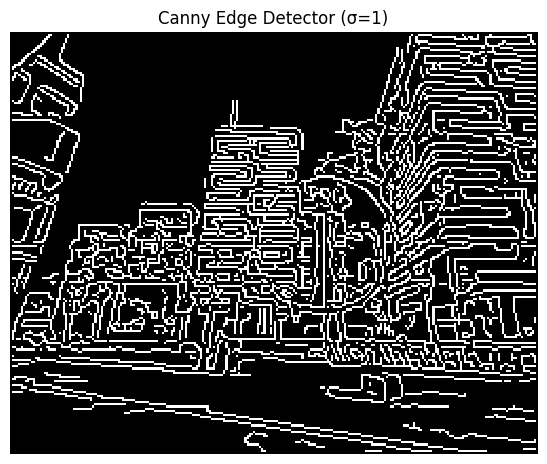

In [15]:
from skimage import feature

# Try default sigma = 1 first
cannyIm = feature.canny(Im, sigma=1)

plt.figure()
io.imshow(cannyIm, cmap='gray')
plt.title('Canny Edge Detector (σ=1)')
plt.axis('off')